In [328]:
#import potential dependencies

import pandas as pd
import json
import numpy
import matplotlib.pyplot as plt
import csv
import seaborn

In [141]:
#identify relevent .csv files as variables

cityData = "city_data.csv"
rideData = "ride_data.csv"

In [317]:
#importing cities information with pandas and csv packages, display first 5 rows

city_pd = pd.read_csv(cityData)
city_pd.head()



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [316]:
#importing ride information with pandas and csv packages, display first 5 rows

ride_pd = pd.read_csv(rideData)
ride_pd.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [315]:
#merge both csvs to link fares to types, cities, etc., display first 5 rows

pyBer_df = pd.merge(city_pd, ride_pd, on='city', how='outer')
pyBer_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [329]:
#create new dataframe with needed information for fare % by region

typeFare = pyBer_df.groupby('type')["fare"].sum().reset_index()
typeFare



,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


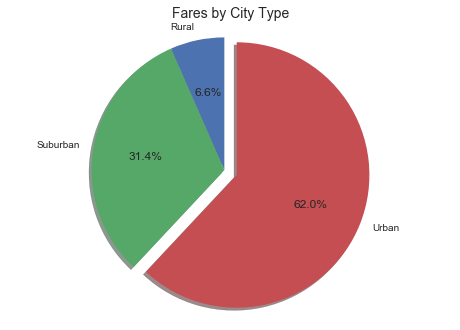

In [331]:
#create pie chart for fares by region type

fig1, ax1 = plt.subplots()
ax1.pie(typeFare["fare"], labels = typeFare["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Fares by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [337]:
#create dataframe of sum of drivers by city type

typeDriver = pyBer_df.groupby('type')["driver_count"].sum().reset_index()
typeDriver

,type,driver_count
0,Rural,727
1,Suburban,9730
2,Urban,64501


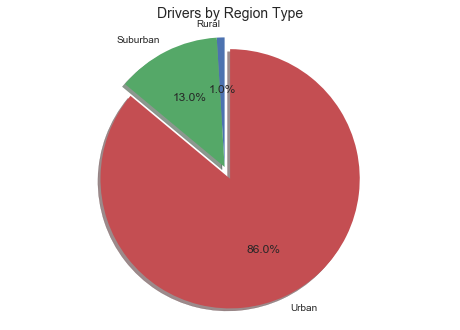

In [338]:
#plot drivers by region type 

fig1, ax1 = plt.subplots()
ax1.pie(typeDriver["driver_count"], labels = typeDriver["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Drivers by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()

In [339]:
#create data frame for rides counting dates on record by city type

typeRides = pyBer_df.groupby('type')["date"].count().reset_index()
typeRides

,type,date
0,Rural,125
1,Suburban,657
2,Urban,1625


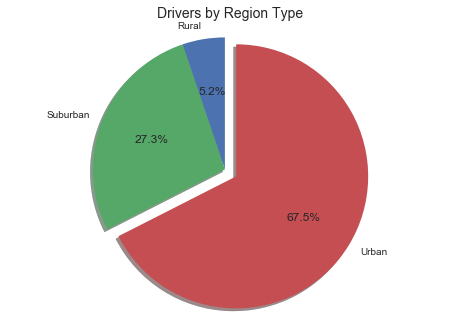

In [340]:
#plot chart of rides by city type

fig1, ax1 = plt.subplots()
ax1.pie(typeRides["date"], labels = typeRides["type"], shadow = True, explode = (0,0,0.1), 
        startangle=90, autopct = "%1.1f%%")
ax1.axis('equal')
plt.title('Ride by City Type', fontsize = 14).axes.get_yaxis().set_visible(False)
plt.show()